# 7_A_B_Testing_to_Boost_Online_Store_Revenue

<a id='back'><a/>
# Table of Contents
    
- [1. A B Testing to Boost Online Store Revenue Overview](#1)
- [2. General Information Overview](#2)
    - [2.1 Hypotheses File](#2.1)
    - [2.2 Orders File](#2.2)
    - [2.3 Visits File](#2.3)
- [3. Data Preprocessing](#3)
    - [3.1 Changing Data Types](#3.1)
    - [3.2 Duplicates](#3.2)
- [4. Prioritizng Hypotheses](#4)
- [5. Exploratory Data Analysis](#5)
    - [5.1 Total Revenue by Group](#5.1)
    - [5.2 Average Order Sizes](#5.2)
    - [5.3 Conversion Rate](#5.3)
    - [5.4 Orders per User](#5.4)
    - [5.5 Orders Prices](#5.5)
- [6. Statistical Data Analysis](#6)
    - [6.1 Raw Data](#6.1)
        - [6.1.1 Conversion Rate](#6.1.1)
        - [6.1.2 Average Order Size](#6.1.2)
    - [6.2 Filtered Data](#6.2)
        - [6.2.1 Conversion Rate](#6.2.1)
        - [6.2.2 Average Order Size](#6.2.2)
- [7. General Conclusion](#7)

<a id='1'><a/>
# 1. A B Testing to Boost Online Store Revenue Overview
[Return to Table of Contents](#back)

The marketing department is looking to boost revenue for the online store. They provided us with several hypotheses to prioritize (using both ICE and RICE frameworks), the analysis of which is included in this document. Equipped with the hypotheses prioritization, the marketing team ran their A/B test. With the results of the A/B test, we will analyze the findings and will make conclusions as to whether one of the groups is a leader or there is no difference between the two groups. Alternatively, we may conclude that the test needs to be continued.

<a id='2'><a/>
# 2. General Information Overview
[Return to Table of Contents](#back)

In [1]:
# import libraries

import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read all input data

try: # local path
    df_hypotheses= pd.read_csv('hypotheses_us.csv',';')
    df_orders= pd.read_csv('orders_us.csv')
    df_visits= pd.read_csv('visits_us.csv')
except: # server path
    df_hypotheses= pd.read_csv('/datasets/hypotheses_us.csv',';')
    df_orders= pd.read_csv('/datasets/orders_us.csv')
    df_visits= pd.read_csv('/datasets/visits_us.csv')

<a id='2.1'><a/>
## 2.1 Hypotheses File
[Return to Table of Contents](#back)

In [3]:
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


The file contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence and Effort specified for each.

<a id='2.2'><a/>
## 2.2 Orders File
[Return to Table of Contents](#back)

In [4]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [5]:
print(df_orders['date'].max())
print(df_orders['date'].min())

2019-08-31
2019-08-01


In [6]:
df_orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [7]:
df_orders.duplicated().sum()

0

In [8]:
# check to see if any visitors ended up in both tests

(df_orders.groupby(['visitorId']).filter(lambda x: x['visitorId']
                                         .count() >= 2.).sort_values(by=['visitorId']).head(15))

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,165.7,B
703,4293855558,8300375,2019-08-07,30.5,A
1102,1941707234,199603092,2019-08-12,100.0,A
823,2971973105,199603092,2019-08-27,45.9,A
134,62794304,199603092,2019-08-22,110.3,A
26,2223239646,199603092,2019-08-15,55.7,A
246,437656952,199603092,2019-08-02,55.7,B
1013,83566152,232979603,2019-08-31,5.9,A
1009,2670069237,232979603,2019-08-31,45.6,B
1097,3357467820,237748145,2019-08-12,10.2,A


The file contains the order results of the A/B test. There are no duplicates or missing values. There are however a number of visitors who appeared in both groups. They will need to be analyzed fruther and likely dropped. Two of the series' categories should be changed ('date' to datetime and 'group' to 'category').

<a id='2.3'><a/>
## 2.3 Visits File
[Return to Table of Contents](#back)

In [9]:
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
df_visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [11]:
df_visits.duplicated().sum()

0

The file contains the visit results of the A/B test. There are no duplicates or missing valuess. Two of the series' categories should be changed ('date' to datetime and 'group' to 'category').

<a id='3'><a/>
# 3. Data Preprocessing
[Return to Table of Contents](#back)

<a id='3.1'><a/>
## 3.1 Changing Data Types
[Return to Table of Contents](#back)

In [12]:
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])

Note that we did not make the series 'group' data type change to 'category' as mentioned above as doing so will impact out ability to carry about necessary operations for this project. 

<a id='3.2'><a/>
## 3.2 Duplicates
[Return to Table of Contents](#back)

While there were no duplicates, we need to drop the visitors that appear in both groups A and B.

In [13]:
# picking users from groups A and B separately users who belong to both groups A and B

A_idx = np.where(df_orders['group']=='A')
B_idx = np.where(df_orders['group']=='B')
group_A = df_orders['visitorId'].values[A_idx]
group_B = df_orders['visitorId'].values[B_idx]

# finding intersection of resulting arrays (i.e. users who belong to both groups A and B)
group_AB = np.intersect1d(group_A, group_B)
group_AB

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [14]:
# the indices of the users that appear in both groups in the dataset

drop_AB_idx = np.where(np.isin(df_orders['visitorId'], group_AB))
drop_AB_idx

(array([   2,   20,   23,   24,   26,   27,   29,   32,   33,   41,   60,
          61,   71,   85,   94,   95,  111,  112,  114,  117,  118,  129,
         133,  134,  139,  159,  179,  187,  189,  197,  200,  219,  225,
         227,  230,  246,  249,  252,  253,  254,  256,  263,  265,  267,
         269,  279,  304,  310,  325,  327,  330,  359,  370,  375,  380,
         390,  391,  402,  406,  415,  430,  432,  435,  450,  453,  454,
         455,  456,  473,  479,  480,  483,  496,  497,  516,  517,  525,
         535,  536,  548,  561,  577,  578,  588,  590,  605,  606,  609,
         611,  624,  627,  662,  672,  674,  675,  676,  677,  682,  685,
         687,  688,  692,  693,  697,  698,  703,  716,  727,  729,  730,
         732,  739,  767,  778,  782,  783,  805,  809,  814,  819,  823,
         829,  832,  838,  842,  844,  857,  858,  861,  873,  879,  883,
         900,  901,  914,  916,  936,  938,  970,  972,  973, 1008, 1009,
        1013, 1015, 1018, 1019, 1021, 

In [15]:
# dropping the users than appear in both groups

df_orders = df_orders.drop(drop_AB_idx[0].tolist())

In [16]:
# check to see what file size was reduced to

df_orders.shape

(1016, 5)

<a id='4'><a/>
# 4. Prioritizing Hypotheses
[Return to Table of Contents](#back)

In [17]:
hypotheses_prioritization_ICE = df_hypotheses.copy()

In [18]:
hypotheses_prioritization_RICE = df_hypotheses.copy()

In [19]:
hypotheses_prioritization_ICE['Score'] = round(((df_hypotheses['Impact'] * df_hypotheses['Confidence']) / 
                                       df_hypotheses['Effort']),1)

In [20]:
hypotheses_prioritization_RICE['Score'] = round((df_hypotheses['Reach'] * df_hypotheses['Impact'] * df_hypotheses['Confidence']) 
                                        / df_hypotheses['Effort'],1)

In [21]:
hypotheses_prioritization_RICE = (hypotheses_prioritization_RICE.drop
                                 (columns=['Reach', 'Impact','Confidence','Effort'])
                                .sort_values(by=['Score'],ascending=False))

In [22]:
hypotheses_prioritization_ICE = (hypotheses_prioritization_ICE.drop
                                 (columns=['Reach', 'Impact','Confidence','Effort',])
                                .sort_values(by=['Score'],ascending=False))

In [23]:
print("RICE Scores:")
print()
print(hypotheses_prioritization_RICE)
print()
print("ICE Scores:")
print()
print(hypotheses_prioritization_ICE)

RICE Scores:

                                          Hypothesis  Score
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0

ICE Scores:

                                          Hypothesis  Score
8  Launch a promotion that gives users discounts ...   16.2
0  Add two new channels for attracting traffic. T...   13.3
7  Add a subscription form to all the main pages....   11.2
6  Show banners with current offers and sales on ...    8.0
2  Add product recommendation blocks to the store...    7.0
1  Launch yo

In [24]:
hypotheses_prioritization_RICE_scatter = hypotheses_prioritization_RICE.reset_index()
hypotheses_prioritization_ICE_scatter = hypotheses_prioritization_ICE.reset_index()

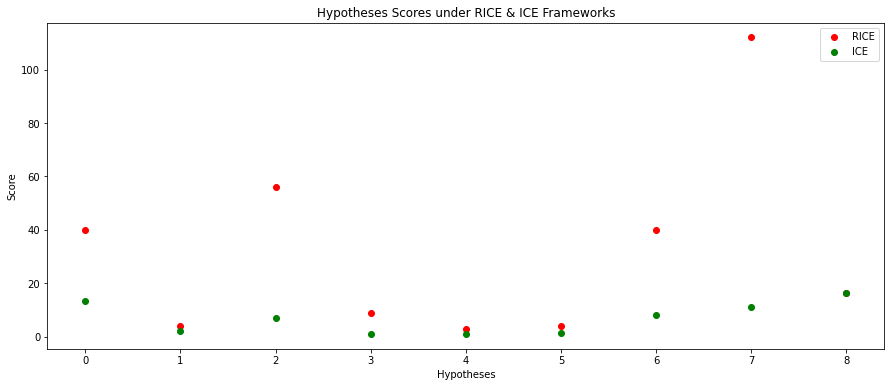

In [25]:
plt.figure(figsize=(15, 6))

plt.scatter(hypotheses_prioritization_RICE_scatter['index'],hypotheses_prioritization_RICE_scatter['Score'], c='red', label='RICE') 
plt.scatter(hypotheses_prioritization_ICE_scatter['index'],hypotheses_prioritization_ICE_scatter['Score'], c='green', label='ICE') 

plt.legend()
plt.title('Hypotheses Scores under RICE & ICE Frameworks')
plt.xlabel('Hypotheses')
plt.ylabel('Score')
plt.show()

The results of our ICE and RICE scores suggest that hypotheses 0 and 7 are the ones that we should test given they are both in the top three for both tests. The differences in the scores is due to the inclusion of "Reach" which is much higher from some hypotheses than others (e.g. Hypotheses 8 has no reach therefore the score is the same under both frameworks).

<a id='5'><a/>
# 5. Exploratory Data Analysis
[Return to Table of Contents](#back)

<a id='5.1'><a/>
## 5.1 Total Revenue By Group
[Return to Table of Contents](#back)

In [26]:
datesGroups = df_orders[['date','group']].drop_duplicates() 

In [27]:
# Reviewer's alternative code formatting example:
ordersAggregated = datesGroups.apply(lambda x: \
                                        df_orders[np.logical_and(df_orders['date'] <= x['date'],
                                        df_orders['group'] == x['group'])].agg(
                                                 {
                                                'date': 'max',
                                                'group': 'max',
                                                'transactionId': pd.Series.nunique,
                                                'visitorId': pd.Series.nunique,
                                                'revenue': 'sum'
                                                 }), 
                                     axis=1).sort_values(by=['date', 'group'])


In [28]:
# aggregating cumulative daily data on visits

visitsAggregated = (datesGroups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], 
                        df_visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 
                        'sum'}), axis=1).sort_values(by=['date','group'])) 

In [29]:
# merging the two tables into one and giving its columns descriptive names

cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      23      19   2266.6     719
1 2019-08-01     B      17      17    967.2     713
2 2019-08-02     A      42      36   3734.9    1338
3 2019-08-02     B      40      39   3535.3    1294
4 2019-08-03     A      66      60   5550.1    1845


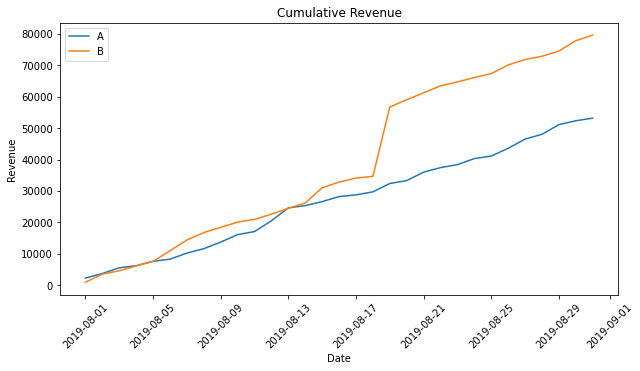

In [30]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Cumulative Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

Revenue is rising for both groups, but around halfway through the experiment, on September 18, there was a jump in revenue for Group B, relative to Group A, which was sustained over the rest of the test period. 

<a id='5.2'><a/>
## 5.2 Average Order Sizes
[Return to Table of Contents](#back)

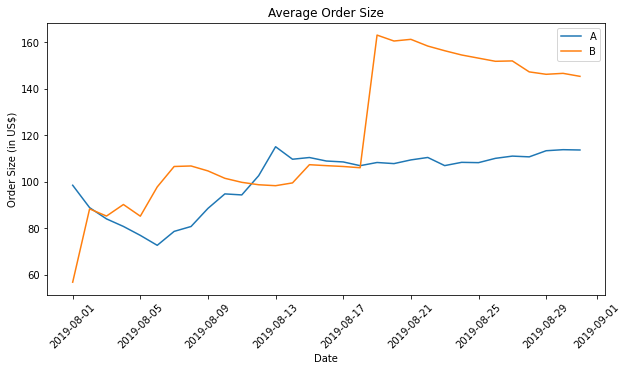

In [31]:
# plotting average order size by group. Will divide cumulative revenue by the cumulative number of orders

plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.legend()
plt.title('Average Order Size')
plt.xlabel('Date')
plt.ylabel('Order Size (in US$)')
plt.xticks(rotation=45)
plt.show()

The average order size of group B is larger than group A. On the same date (September 18) that we saw revenue increase, the average order size increased dramatically as well, which seems to imply that more spending, not necessarily more purchases by volume, was the driving factor. 

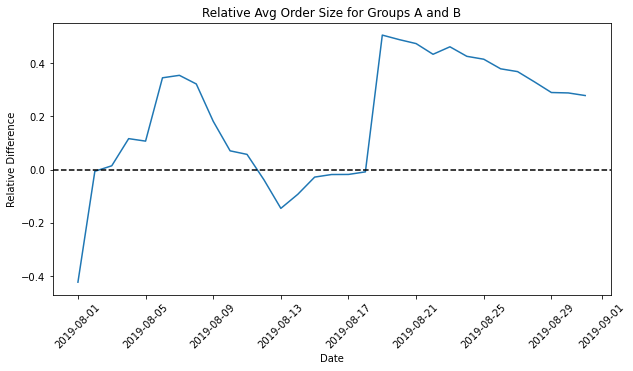

In [32]:
# plotting a relative difference graph for the average purchase sizes

# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Relative Avg Order Size for Groups A and B')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.xticks(rotation=45)
plt.show()

At several points the difference between the segments spikes. This means there must be some big orders and outliers in Group B. Separate to that, we can see that after the September 18th spike, the relative average order size is shrinking.

<a id='5.3'><a/>
## 5.3 Conversion Rate
[Return to Table of Contents](#back)

In [33]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


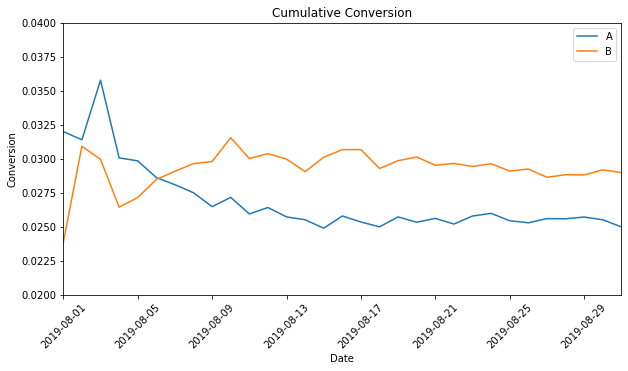

In [34]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10, 5))

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])

plt.title('Cumulative Conversion')
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.xticks(rotation=45)
plt.show()

The conversion rate of group B stablized fairly early on while the conversion rate of group A dropped but then stabilized as well. For the majority of the test, the conversion rate for B was higher than A.

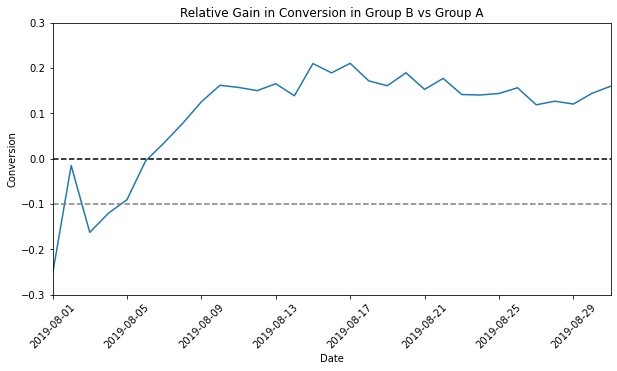

In [35]:
# plot of relative difference graph for the cumulative conversion rates

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3]) 

plt.title('Relative Gain in Conversion in Group B vs Group A')
plt.xlabel('Date')
plt.ylabel('Conversion')
plt.xticks(rotation=45)
plt.show()

At the beginning of the test, group B was lagging behind noticeably, but then quickly it took the lead in relative gain in conversion and has been relatively stable versus Group A.

<a id='5.4'><a/>
## 5.4 Orders per User
[Return to Table of Contents](#back)

In [36]:
group_orders = df_orders.drop(['transactionId','date','revenue'], axis=1)

In [37]:
group_orders.head()

,visitorId,group
0,3312258926,B
1,3642806036,B
3,1196621759,B
4,2322279887,B
5,935554773,B


In [38]:
orders_per_user = df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_per_user.columns = ['visitorId','orders']

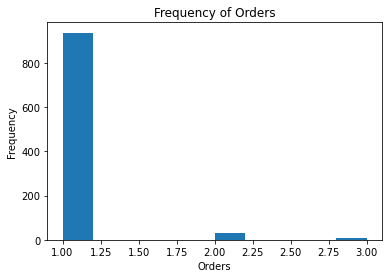

In [39]:
plt.hist(orders_per_user['orders'])

plt.title('Frequency of Orders')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.show()

In [40]:
test = orders_per_user.merge(group_orders, on='visitorId', how='inner')

In [41]:
test.head()

,visitorId,orders,group
0,5114589,1,B
1,6958315,1,B
2,11685486,1,A
3,39475350,1,B
4,47206413,1,B


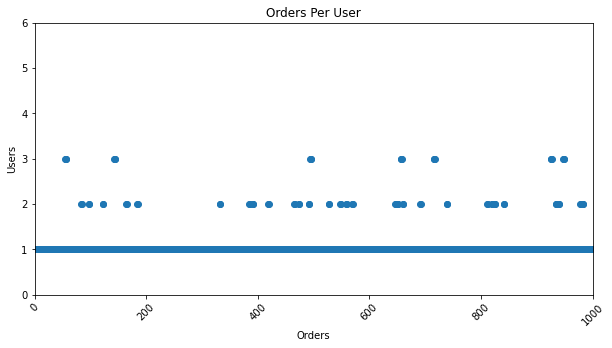

In [42]:
number_of_orders = pd.Series(range(0,len(test)))

plt.figure(figsize=(10, 5))

plt.scatter(number_of_orders, test['orders'])
plt.title('Orders Per User')
plt.xlabel('Orders')
plt.ylabel('Users')
plt.xticks(rotation=45)
plt.axis([0, 1000, 0, 6]) 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


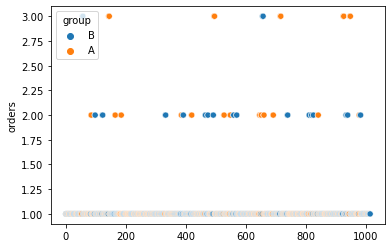

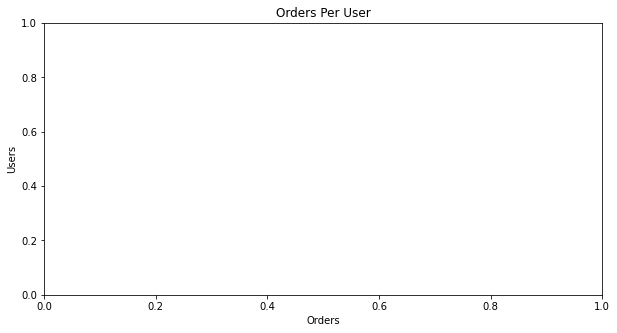

In [43]:
# alternative chart

number_of_orders = pd.Series(range(0,len(test)))

sns.scatterplot(number_of_orders, 'orders', hue="group", data=test)

plt.figure(figsize=(10, 5))

plt.title('Orders Per User')
plt.xlabel('Orders')
plt.ylabel('Users')

plt.show()

In [44]:
# calculating the 95th and 99th percentiles for the number of orders per user

print(np.percentile(orders_per_user['orders'], [95, 99])) 

[1. 2.]


No more than 5% of users made more than 1 order. No more than 1% of users made more than 2 orders. Anything above 1 is abnormal.

<a id='5.5'><a/>
## 5.5 Order Prices
[Return to Table of Contents](#back)

In [45]:
order_prices = df_orders.drop(['group', 'visitorId', 'date'], axis=1).groupby('revenue', as_index=False).agg({'transactionId' : pd.Series.nunique})
order_prices.columns = ['revenue','orders']

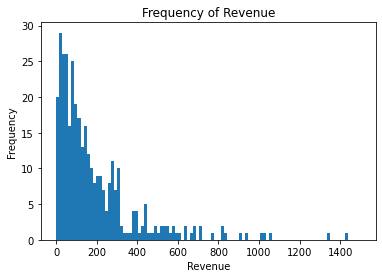

In [46]:
plt.hist(order_prices['revenue'], bins=100, range=[0, 1500])

plt.title('Frequency of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

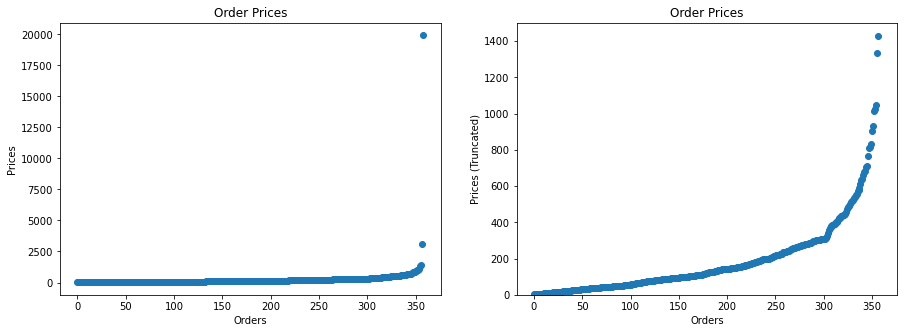

In [47]:
number_of_orders = pd.Series(range(0,len(order_prices)))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(number_of_orders, order_prices['revenue']) 
axs[0].set_title('Order Prices')
axs[0].set_xlabel('Orders')
axs[0].set_ylabel('Prices')

axs[1].scatter(number_of_orders, order_prices['revenue']) 
axs[1].set_title('Order Prices')
axs[1].set_xlabel('Orders')
axs[1].set_ylabel('Prices (Truncated)')
axs[1].set(ylim=(0, 1500))

plt.show()

In [48]:
# calculating the 95th and 99th percentiles for the norder prices

print(np.percentile(order_prices['revenue'], [95, 99])) 

[ 642.68  1169.952]


No more than 5% of orders were over USD 642.68. No more than 1% of orders were more than USD 1169.95. Anything above ~USD 500 is abnormal.

<a id='6'><a/>
# 6. Statistical Data Analysis
[Return to Table of Contents](#back)

For these analyses, we have been asked to compare the conversion rates and average order sizes of the two groups, using both raw and also filtered (i.e. no outliers) data. 

<a id='6.1'><a/>
## 6.1 Raw Data
[Return to Table of Contents](#back)

<a id='6.1.1'><a/>
### 6.1.1 Conversion Rate 
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): conversion for Group A = conversion for Group B; </li>
 <li>H1 (alternative hypothesis): conversion for Group A <> conversion for Group B </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [49]:
df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

,visitorId,transactionId
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


In [50]:
# Creating the variables ordersByUsersA and ordersByUsersB to store the columns ['visitorId', 'orders']. 
# For users with at least one order, we'll indicate the number of orders made

ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


The first row of the output gives us the p-value, 0.011, which is less than 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative gain of group B is 16.2% (the second row of the output).

<a id='6.1.2'><a/>
### 6.1.2 Average Order Size 
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average order size for Group A = average order size for Group B; </li>
 <li>H1 (alternative hypothesis): average order size for Group A <> average order size for Group B </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [51]:
# calculating the statistical significance of the difference in the segments' average order size

print("{0:.3f}".format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print("{0:.3f}".format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. However, we do find here that the average order size for group A is much smaller than it is for group B (this confirms the results we got early in Exploratory Data Analysis).

<a id='6.2'><a/>
## 6.2 Filtered Data
[Return to Table of Contents](#back)

In [52]:
# totaling abnormal users
# setting order outliers as > 2 based on our percentile test
# setting revenue outliers as > USD1200 based on our percentile test

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 1200]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

58       611059232
744      888512513
1136    1307669133
425     1920142716
1196    2108080724
Name: visitorId, dtype: int64
(9,)


We have 9 anomalies based on the parameters defined above.

In [53]:
# calculating the statistical significance of the differences in conversion between the groups, using filtered data

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

<a id='6.2.1'><a/>
### 6.2.1 Conversion Rate 
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): conversion for Group A = conversion for Group B; </li>
 <li>H1 (alternative hypothesis): conversion for Group A <> conversion for Group B </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [54]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.008
0.194


The results for conversion had a negligible change post filtering. The p-value is 0.008. So we can continue to reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.

<a id='6.2.2'><a/>
### 6.2.2 Average Order Size 
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average order size for Group A = average order size for Group B; </li>
 <li>H1 (alternative hypothesis): average order size for Group A <> average order size for Group B </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

In [55]:
print("{0:.3f}".format(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')[1]))

print("{0:.3f}".format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.715
-0.085


The p-value decreased slightly but it still considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. However the difference between the segments is 8.5% instead of 27.8% showing us that anomalies did affect the A/B test results.

<a id='7'><a/>
# 7. General Conclusion
[Return to Table of Contents](#back)

**Data Processing**

We were provided with three files for this analysis. The data was generally clean (i.e. no not many data type or formatting changes) so preprocessing was minimal in that regard. It is however important to note While there were no duplicates, we needed to drop the visitors that appeared in both groups A and B.

**Prioritizing Hypotheses**

The results of our ICE and RICE scores suggest that hypotheses 0 and 7 are the ones that we should test given they are both in the top three for both tests.

**Exploratory Data Analysis**

Revenue is rising for both groups, but around halfway through the experiment, on September 18, there was a jump in revenue for Group B, relative to Group A, which was sustained over the rest of the test period. On the same date that we saw revenue increase, the average order size increased dramatically as well, which seems to imply that more spending, not necessarily more purchases by volume, was the driving factor. This was supported by the findings that No more than 5% of users made more than 1 order. No more than 1% of users made more than 2 orders and no more than 5% of orders were over USD 642.68. No more than 1% of orders were more than USD 1169.95..The conversion rate of group B stablized fairly early on while the conversion rate of group A dropped but then stabilized as well. For the majority of the test, the conversion rate for B was higher than A.

**Statistical Data Analysis**

Both both the conversion rate and average order size tests, neither raw nor filtered data revealed any statistically significant differences between the groups.

**Recommendations to Regarding Continuation of A/B Test**

In the course of our analysis we saw that the difference for average order size between the groups indicated that group A's results are worse than Group Bs, though they seemed to be improving. This was likely due to outliers. We also saw average conversion between the groups larger in Group B (3%) than with Group A (2.5%) and those levels have been stable. Based on these facts, we recommend that the test be stopped. However, in our statistical test, we saw that there is a statistical difference between the conversion rates between the two group. As such, we recommend ending the test. Group B outperformed Group A. As a next step, please look into what might be causing the statistical differences in conversion.